In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("/kaggle/input/application-train/application_train_vf_after_discretisation.csv")

In [4]:
data.head()

,TARGET,CNT_CHILDREN,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,...,FONDKAPREMONT_MODE_discret,HOUSETYPE_MODE_discret,AMT_GOODS_PRICE_binned,DAYS_BIRTH_binned,EXT_SOURCE_2_binned,EXT_SOURCE_3_binned,REGION_POPULATION_RELATIVE_binned,DAYS_REGISTRATION_binned,DAYS_ID_PUBLISH_binned,DAYS_LAST_PHONE_CHANGE_binned
0,0,1,1,0,1,3.0,3,3,0,0,...,not_specified,appartment,"[450117.00, inf)","[-13346.50, inf)","[0.26, 0.62)","[0.32, 0.75)","(-inf, 0.03)","[-7418.50, inf)","[-4068.50, inf)","[-1122.50, inf)"
1,0,0,1,0,1,2.0,3,3,0,0,...,not_specified,houses,"(-inf, 407362.50)","[-13346.50, inf)","[0.26, 0.62)","[0.32, 0.75)","(-inf, 0.03)","[-7418.50, inf)","[-4068.50, inf)","[-1122.50, inf)"
2,0,2,1,1,0,4.0,2,2,0,0,...,not_specified,appartment,"(-inf, 407362.50)","[-13346.50, inf)","[0.26, 0.62)","[0.32, 0.75)","(-inf, 0.03)","(-inf, -7418.50)","[-4068.50, inf)","[-1122.50, inf)"
3,0,1,1,0,0,2.0,1,1,0,0,...,reg,appartment,"[450117.00, inf)","[-19503.50, -13346.50)","[0.26, 0.62)","[0.32, 0.75)","[0.03, inf)","(-inf, -7418.50)","(-inf, -4068.50)","[-1122.50, inf)"
4,0,1,1,0,1,3.0,2,2,1,1,...,not_specified,houses,"(-inf, 407362.50)","[-19503.50, -13346.50)","(-inf, 0.26)","[0.32, 0.75)","(-inf, 0.03)","[-7418.50, inf)","(-inf, -4068.50)","(-inf, -1122.50)"


In [5]:
data["date_mensuelle"] = pd.to_datetime(data['date_mensuelle'])

In [18]:
data.iloc[:, :40]

,TARGET,CNT_CHILDREN,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,EMERGENCYSTATE_MODE,date_mensuelle,NAME_EDUCATION_TYPE_discret,OCCUPATION_TYPE_discret,FONDKAPREMONT_MODE_discret,HOUSETYPE_MODE_discret,AMT_GOODS_PRICE_binned
0,0,1,1,0,1,3,3,3,0,0,...,1,1,1,0,2013-01-01,1,1,0,0,2
1,0,0,1,0,1,2,3,3,0,0,...,0,1,5,2,2013-01-01,0,2,0,1,0
2,0,2,1,1,0,4,2,2,0,0,...,1,0,1,0,2013-01-01,1,1,0,0,0
3,0,1,1,0,0,2,1,1,0,0,...,1,1,1,0,2013-01-01,1,2,1,0,2
4,0,1,1,0,1,3,2,2,1,1,...,0,0,1,2,2013-01-01,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306102,0,0,0,0,0,2,3,3,0,0,...,0,0,1,0,2020-12-01,1,2,1,0,2
306103,0,0,1,0,0,1,2,2,0,0,...,0,1,1,2,2020-12-01,1,2,0,1,0
306104,0,0,1,0,1,2,1,1,0,0,...,0,1,1,0,2020-12-01,1,2,1,0,2
306105,0,0,0,0,0,2,3,3,0,0,...,0,1,1,0,2020-12-01,1,2,0,0,0


In [6]:
cols = ['CNT_CHILDREN',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_18',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_QRT']

for col in cols:
    data[col] = data[col].astype(int)

In [7]:
data.dtypes

TARGET                                        int64
CNT_CHILDREN                                  int64
FLAG_EMP_PHONE                                int64
FLAG_WORK_PHONE                               int64
FLAG_PHONE                                    int64
CNT_FAM_MEMBERS                               int64
REGION_RATING_CLIENT                          int64
REGION_RATING_CLIENT_W_CITY                   int64
REG_REGION_NOT_LIVE_REGION                    int64
REG_REGION_NOT_WORK_REGION                    int64
REG_CITY_NOT_LIVE_CITY                        int64
REG_CITY_NOT_WORK_CITY                        int64
LIVE_CITY_NOT_WORK_CITY                       int64
DEF_30_CNT_SOCIAL_CIRCLE                      int64
DEF_60_CNT_SOCIAL_CIRCLE                      int64
FLAG_DOCUMENT_2                               int64
FLAG_DOCUMENT_3                               int64
FLAG_DOCUMENT_6                               int64
FLAG_DOCUMENT_8                               int64
FLAG_DOCUMEN

In [16]:
le = LabelEncoder()
strings = data.select_dtypes(include="object").columns
for col in strings:
    if len(data[col].unique()) > 1:data[col] = le.fit_transform(data[col])
    else:
        ata[col] = 0

In [17]:
data.head()

,TARGET,CNT_CHILDREN,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,...,FONDKAPREMONT_MODE_discret,HOUSETYPE_MODE_discret,AMT_GOODS_PRICE_binned,DAYS_BIRTH_binned,EXT_SOURCE_2_binned,EXT_SOURCE_3_binned,REGION_POPULATION_RELATIVE_binned,DAYS_REGISTRATION_binned,DAYS_ID_PUBLISH_binned,DAYS_LAST_PHONE_CHANGE_binned
0,0,1,1,0,1,3,3,3,0,0,...,0,0,2,1,1,1,0,1,1,1
1,0,0,1,0,1,2,3,3,0,0,...,0,1,0,1,1,1,0,1,1,1
2,0,2,1,1,0,4,2,2,0,0,...,0,0,0,1,1,1,0,0,1,1
3,0,1,1,0,0,2,1,1,0,0,...,1,0,2,2,1,1,1,0,0,1
4,0,1,1,0,1,3,2,2,1,1,...,0,1,0,2,0,1,0,1,0,0


In [20]:
df_validation = data[data['date_mensuelle']>"2020-06-30"]

df = data[data['date_mensuelle']<"2019-12-31"]

In [21]:
df

,TARGET,CNT_CHILDREN,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,...,FONDKAPREMONT_MODE_discret,HOUSETYPE_MODE_discret,AMT_GOODS_PRICE_binned,DAYS_BIRTH_binned,EXT_SOURCE_2_binned,EXT_SOURCE_3_binned,REGION_POPULATION_RELATIVE_binned,DAYS_REGISTRATION_binned,DAYS_ID_PUBLISH_binned,DAYS_LAST_PHONE_CHANGE_binned
0,0,1,1,0,1,3,3,3,0,0,...,0,0,2,1,1,1,0,1,1,1
1,0,0,1,0,1,2,3,3,0,0,...,0,1,0,1,1,1,0,1,1,1
2,0,2,1,1,0,4,2,2,0,0,...,0,0,0,1,1,1,0,0,1,1
3,0,1,1,0,0,2,1,1,0,0,...,1,0,2,2,1,1,1,0,0,1
4,0,1,1,0,1,3,2,2,1,1,...,0,1,0,2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267738,0,0,0,0,0,1,2,2,0,0,...,0,1,0,0,1,1,0,0,0,1
267739,0,0,1,0,1,1,2,2,0,0,...,0,0,2,2,2,1,0,1,1,0
267740,0,0,1,1,0,2,2,2,0,0,...,0,1,2,0,2,1,0,0,1,0
267741,0,0,1,1,0,2,3,3,0,0,...,0,1,0,1,1,1,0,1,1,0


In [22]:
df['TARGET'].value_counts()


TARGET
0    247296
1     20447
Name: count, dtype: int64

In [24]:
# Sélectionner les données
X_train = df.copy() # On drop les var qui ont trop de NaN
X_test = df_validation.copy()

X_train = X_train.select_dtypes(exclude = 'datetime')
X_train.dropna(inplace = True)

y_train = X_train['TARGET']


X_train.drop(columns = 'TARGET', inplace = True)

X_test = X_test.select_dtypes(exclude = 'datetime')
X_test.dropna(inplace = True)

y_test = X_test['TARGET']

X_test.drop(columns = 'TARGET', inplace = True)

In [25]:
X_train.columns

Index(['CNT_CHILDREN', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE',
       'EMERGENCYSTATE_MODE', 'NAME_EDUCATION_TYPE_discret',
       'OCCUPATION_TYPE_discret', 'FONDKAPREMONT_MODE_discret',
       'HOUSETYPE_MODE_discret', 'AMT_GOODS_PRICE_binned', 'DAYS_BIRTH_binned',
       'E

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score

In [28]:
model = LogisticRegression(penalty='l1', solver='liblinear')

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

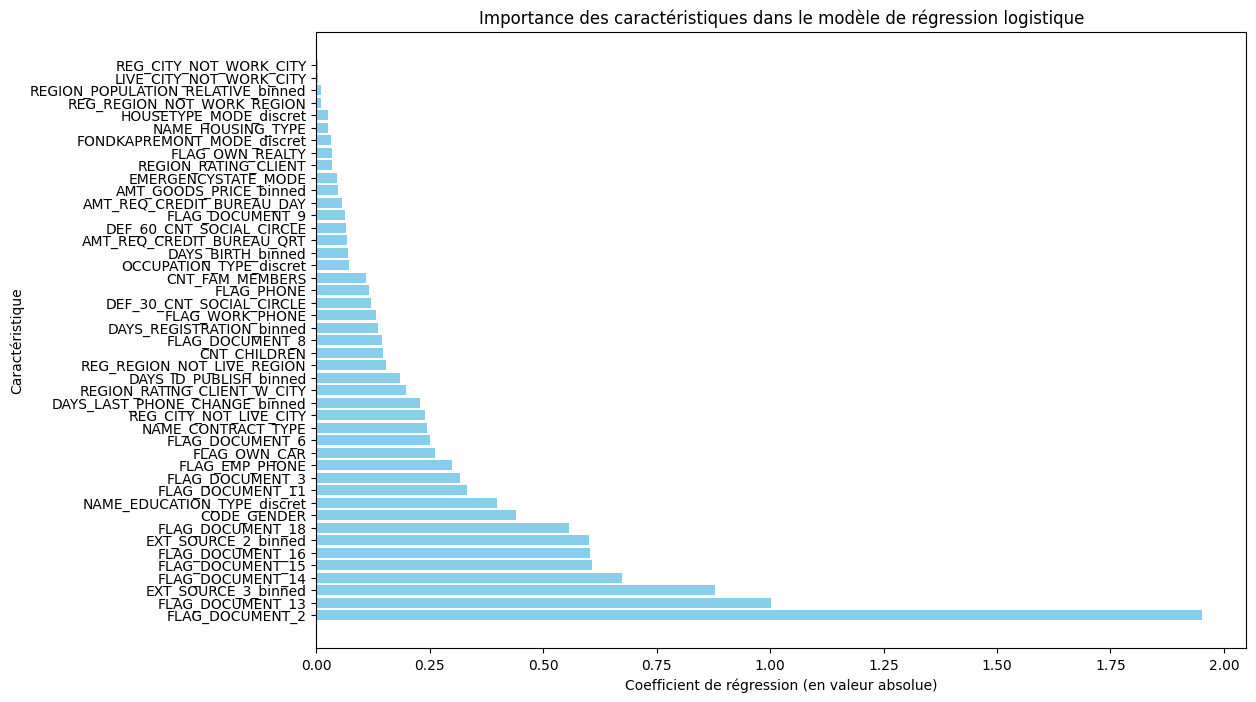

In [29]:
coefficients = model.coef_[0]

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Abs_Coefficient'], color='skyblue')
plt.xlabel('Coefficient de régression (en valeur absolue)')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques dans le modèle de régression logistique')
plt.show()

In [34]:
feature_importance_df.reset_index(drop=True, inplace=True)
feature_importance_df


,Feature,Coefficient,Abs_Coefficient
0,FLAG_DOCUMENT_2,1.952161,1.952161
1,FLAG_DOCUMENT_13,-1.001269,1.001269
2,EXT_SOURCE_3_binned,-0.878881,0.878881
3,FLAG_DOCUMENT_14,-0.673429,0.673429
4,FLAG_DOCUMENT_15,-0.606786,0.606786
5,FLAG_DOCUMENT_16,-0.602847,0.602847
6,EXT_SOURCE_2_binned,-0.600421,0.600421
7,FLAG_DOCUMENT_18,-0.555878,0.555878
8,CODE_GENDER,0.439650,0.439650
9,NAME_EDUCATION_TYPE_discret,0.397042,0.397042


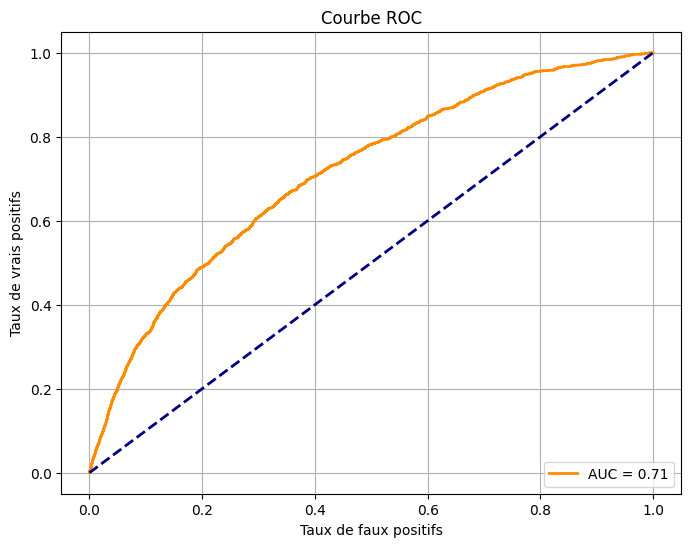

In [32]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()